In [245]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [250]:
# Reading datasets
df_2016 = pd.read_csv('NBA-season-2016-2017.csv')
df_2017 = pd.read_csv('NBA-season-2017-2018.csv')
df_2018 = pd.read_csv('NBA-season-2018-2019.csv')
df_players = pd.read_csv('NBA-playerlist.csv')

# Dataset Preprocessing

In [357]:
# Rows with value '18' in EVENTMSGTYPE column does not provide any information
df_2018.loc[df_2018['EVENTMSGTYPE'] == 18].head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
42,42,0,18,63,21800794,NaN,NaN,7:05,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,12 - 6,-6,NaN,9:18 PM
203,203,1,18,313,21800794,NaN,NaN,0:54,2,0.0,...,0,NaN,NaN,NaN,NaN,NaN,61 - 55,-6,NaN,10:00 PM
335,335,0,18,486,21800794,NaN,NaN,0:00,3,0.0,...,0,NaN,NaN,NaN,NaN,NaN,94 - 80,-14,NaN,10:47 PM
556,107,0,18,159,21800982,NaN,NaN,0:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,23 - 29,6,NaN,8:36 PM
827,378,0,18,559,21800982,NaN,NaN,7:30,4,0.0,...,0,NaN,NaN,NaN,NaN,NaN,87 - 93,6,NaN,9:55 PM


In [ ]:
# Remove rows with value '18' in EVENTMSGTYPE column from all datasets
df_2016 = df_2016[df_2016.EVENTMSGTYPE != 18]
df_2017 = df_2017[df_2017.EVENTMSGTYPE != 18]
df_2018 = df_2018[df_2018.EVENTMSGTYPE != 18]

In [ ]:
# Sort games from oldest to latest in dataset
df_2016 = df_2016.sort_values(["GAME_ID", "EVENTNUM"]).reset_index(drop=True)
df_2017 = df_2017.sort_values(["GAME_ID", "EVENTNUM"]).reset_index(drop=True)
df_2018 = df_2018.sort_values(["GAME_ID", "EVENTNUM"]).reset_index(drop=True)

***
# Descriptive Statistics

SAS committed the least amount of fouls
PHX committed the most amount of fouls
The mean number for fouls committed of an NBA team is 3534


Text(0, 0.5, 'Fouls Committed')

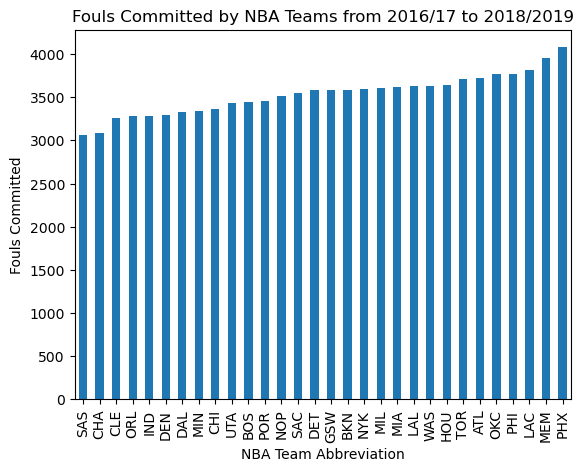

In [443]:
# Fouls called against each team
teamFouls_16 = df_2016.groupby('PLAYER1_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouls_17 = df_2017.groupby('PLAYER1_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouls_18 = df_2018.groupby('PLAYER1_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())

aggregate_teamFouls = pd.concat([teamFouls_16, teamFouls_17, teamFouls_18], axis=1)
teamFouls = aggregate_teamFouls.sum(axis=1)

min_teamFouls = teamFouls.idxmin()
max_teamFouls = teamFouls.idxmax()
mean_teamFouls = int(teamFouls.mean())
print(f"{min_teamFouls} committed the least amount of fouls")
print(f"{max_teamFouls} committed the most amount of fouls")
print(f"The mean number for fouls committed of an NBA team is {mean_teamFouls}")

sorted_teamFouls = teamFouls.sort_values()
sorted_teamFouls.plot(kind='bar')
plt.title("Fouls Committed by NBA Teams from 2016/17 to 2018/2019")
plt.xlabel("NBA Team Abbreviation")
plt.ylabel("Fouls Committed")

CHI is the least fouled team
LAC is the most fouled team
The mean number for fouls called for an NBA team is 3451


Text(0, 0.5, 'Fouls Committed Against')

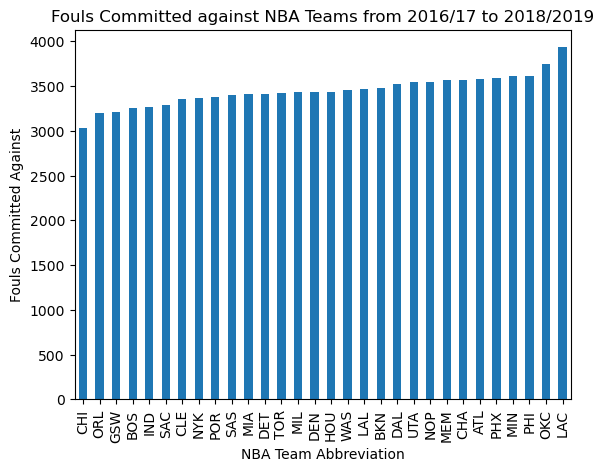

In [444]:
# Fouls called for each team
teamFouleds_16 = df_2016.groupby('PLAYER2_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouleds_17 = df_2017.groupby('PLAYER2_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouleds_18 = df_2018.groupby('PLAYER2_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())

aggregate_teamFouleds = pd.concat([teamFouleds_16, teamFouleds_17, teamFouleds_18], axis=1)
teamFouleds = aggregate_teamFouleds.sum(axis=1)

min_teamFouleds = teamFouleds.idxmin()
max_teamFouleds = teamFouleds.idxmax()
mean_teamFouleds = int(teamFouleds.mean())
print(f"{min_teamFouleds} is the least fouled team")
print(f"{max_teamFouleds} is the most fouled team")
print(f"The mean number for fouls called for an NBA team is {mean_teamFouleds}")

sorted_teamFouleds = teamFouleds.sort_values()
sorted_teamFouleds.plot(kind='bar')
plt.title("Fouls Committed against NBA Teams from 2016/17 to 2018/2019")
plt.xlabel("NBA Team Abbreviation")
plt.ylabel("Fouls Committed Against")

In [356]:
# Fouls per game, and how many fouls were committed by home teams, and visitor teams
df16_fouls = df_2016.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[x.EVENTMSGTYPE == 6].count())
df17_fouls = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[x.EVENTMSGTYPE == 6].count())
df18_fouls = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[x.EVENTMSGTYPE == 6].count())

df18_fouls.head()

,EVENTMSGTYPE,HOMEDESCRIPTION,VISITORDESCRIPTION
GAME_ID,,,
21800001,40,20,20
21800002,50,29,21
21800003,44,19,25
21800004,46,21,25
21800005,42,24,18


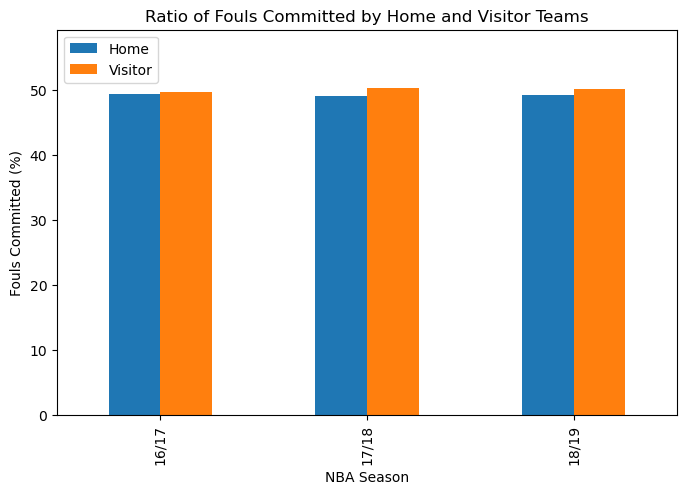

In [445]:
data = [[df16_fouls['HOMEDESCRIPTION'].sum() / df16_fouls['EVENTMSGTYPE'].sum() * 100, df16_fouls['VISITORDESCRIPTION'].sum() / df16_fouls['EVENTMSGTYPE'].sum() * 100],
        [df17_fouls['HOMEDESCRIPTION'].sum() / df17_fouls['EVENTMSGTYPE'].sum() * 100, df17_fouls['VISITORDESCRIPTION'].sum() / df17_fouls['EVENTMSGTYPE'].sum() * 100],
        [df18_fouls['HOMEDESCRIPTION'].sum() / df18_fouls['EVENTMSGTYPE'].sum() * 100, df18_fouls['VISITORDESCRIPTION'].sum() / df18_fouls['EVENTMSGTYPE'].sum() * 100]
]
total_fouls = df_2016['EVENTMSGTYPE'].value_counts()[6] + df_2017['EVENTMSGTYPE'].value_counts()[6] + df_2018['EVENTMSGTYPE'].value_counts()[6]
foulPercentage = pd.DataFrame(data, columns=['Home', "Visitor"], index=['16/17', '17/18', '18/19'])

foulPercentage.plot(kind='bar', figsize=(8,5)).legend(loc='upper left')
plt.title("Ratio of Fouls Committed by Home and Visitor Teams")
plt.xlabel("NBA Season")
plt.ylabel("Fouls Committed (%)")
plt.margins(y=0.18)

***
# Classification

In [393]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

### Data Transformation for classification

Gathering winners of each NBA game in 2017/18 season & 2018/19 season

In [353]:
# Score Margins for each Game in the datasets
# Positive SCOREMARGIN = Home team wins
# Negative SCOREMARGIN = Visitor team wins

# 17/18 Season dataset
winners_17 = df_2017[(df_2017["EVENTMSGTYPE"] == 13) & (df_2017["PERIOD"] == 4)][['GAME_ID', 'SCOREMARGIN']]
winners_17['WINNER'] = winners_17.apply(lambda x: 
                                        'TIE' if (x['SCOREMARGIN'] == 'TIE') else 
                                        'VISITOR' if (x['SCOREMARGIN'][0] == '-') else
                                        'HOME',
                                        axis=1
                                       )
# 18/19 Season dataset
winners_18 = df_2018[(df_2018["EVENTMSGTYPE"] == 13) & (df_2018["PERIOD"] == 4)][['GAME_ID', 'SCOREMARGIN']]
winners_18['WINNER'] = winners_18.apply(lambda x: 
                                        'TIE' if (x['SCOREMARGIN'] == 'TIE') else 
                                        'VISITOR' if (x['SCOREMARGIN'][0] == '-') else
                                        'HOME',
                                        axis=1
                                       )

winners_18.head()

,GAME_ID,SCOREMARGIN,WINNER
448,21800794,-8,VISITOR
898,21800982,10,HOME
1327,21800758,-24,VISITOR
1777,21800825,20,HOME
2256,21801144,-5,VISITOR


Pairing the home and visitor team in each NBA game with the final results

In [352]:
# Home and Visitor Teams, along with the winner of each game in the dataset
schedule_2017 = df_2017[(df_2017["EVENTMSGTYPE"] == 10) & (df_2017["PERIOD"] == 1) & (df_2017['PCTIMESTRING'] == '12:00')][['GAME_ID', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_ABBREVIATION']]
schedule_2018 = df_2018[(df_2018["EVENTMSGTYPE"] == 10) & (df_2018["PERIOD"] == 1) & (df_2018['PCTIMESTRING'] == '12:00')][['GAME_ID', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_ABBREVIATION']]

schedule_wins_17 = pd.merge(schedule_2017, winners_17, on=['GAME_ID'])
schedule_wins_18 = pd.merge(schedule_2018, winners_18, on=['GAME_ID'])

schedule_wins_17.columns =['GAME_ID', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME', 'SCOREMARGIN', 'WINNER']
schedule_wins_18.columns =['GAME_ID', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME', 'SCOREMARGIN', 'WINNER']

schedule_wins_18.head()

,GAME_ID,HOME_ID,HOME_NAME,VISITOR_ID,VISITOR_NAME,SCOREMARGIN,WINNER
0,21800794,1.610613e+09,PHX,1.610613e+09,HOU,-8,VISITOR
1,21800982,1.610613e+09,MEM,1.610613e+09,UTA,10,HOME
2,21800758,1.610613e+09,NYK,1.610613e+09,DAL,-24,VISITOR
3,21800825,1.610613e+09,UTA,1.610613e+09,SAS,20,HOME
4,21801144,1.610613e+09,PHX,1.610613e+09,MEM,-5,VISITOR


In [349]:
# Name of winner for each Game in the datasets
# 17/18 Season dataset
results_17 = schedule_wins_17[['GAME_ID', 'HOME_NAME', 'VISITOR_NAME', 'WINNER']][schedule_wins_17['WINNER'] != 'TIE']
results_17['WINNER_TEAM'] = results_17.apply(lambda x: 
                                        'TIE' if (x['WINNER'] == 'TIE') else 
                                        x['HOME_NAME'] if (x['WINNER'] == 'HOME') else
                                        x['VISITOR_NAME'],
                                        axis=1
                                       )
# 18/19 Season dataset
results_18 = schedule_wins_18[['GAME_ID', 'HOME_NAME', 'VISITOR_NAME', 'WINNER']][schedule_wins_18['WINNER'] != 'TIE']
results_18['WINNER_TEAM'] = results_18.apply(lambda x: 
                                        'TIE' if (x['WINNER'] == 'TIE') else 
                                        x['HOME_NAME'] if (x['WINNER'] == 'HOME') else
                                        x['VISITOR_NAME'],
                                        axis=1
                                       )

results_18.head()

,GAME_ID,HOME_NAME,VISITOR_NAME,WINNER,WINNER_TEAM
0,21800794,PHX,HOU,VISITOR,HOU
1,21800982,MEM,UTA,HOME,MEM
2,21800758,NYK,DAL,VISITOR,DAL
3,21800825,UTA,SAS,HOME,UTA
4,21801144,PHX,MEM,VISITOR,MEM


***
# Predicting the result of an NBA game based on Field Goal Percentage

In [322]:
df17_fieldGoalPct = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: (x[x.EVENTMSGTYPE == 1].count()) / (x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count()))
df18_fieldGoalPct = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: (x[x.EVENTMSGTYPE == 1].count()) / (x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count()))

df17_fieldGoalPct = df17_fieldGoalPct.drop('EVENTMSGTYPE', axis=1)
df18_fieldGoalPct = df18_fieldGoalPct.drop('EVENTMSGTYPE', axis=1)

In [351]:
# 2017/18 Schedule with competing teams and their respective shot fieldGoalPct
schedule_fieldGoalPct_17 = pd.merge(df17_fieldGoalPct, schedule_2017, on= ['GAME_ID'])
schedule_fieldGoalPct_17.columns = ['GAME_ID', 'HOME_FG_PCT', 'VISITOR_FG_PCT', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
# 2017/18 Schedule with competing teams and their respective shot fieldGoalPct, and the final score margin and winner
schedule_fieldGoalPct_wins_17 = pd.merge(schedule_fieldGoalPct_17, schedule_wins_17, on=['GAME_ID'])

# 2018/19 Schedule with competing teams and their respective shot fieldGoalPct
schedule_fieldGoalPct_18 = pd.merge(df18_fieldGoalPct, schedule_2018, on= ['GAME_ID'])
schedule_fieldGoalPct_18.columns = ['GAME_ID', 'HOME_FG_PCT', 'VISITOR_FG_PCT', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
# 2018/19 Schedule with competing teams and their respective shot fieldGoalPct, and the final score margin and winner
schedule_fieldGoalPct_wins_18 = pd.merge(schedule_fieldGoalPct_18, schedule_wins_18, on=['GAME_ID'])

schedule_fieldGoalPct_wins_18.head()

,GAME_ID,HOME_FG_PCT,VISITOR_FG_PCT,HOME_ID_x,HOME_NAME_x,VISITOR_ID_x,VISITOR_NAME_x,HOME_ID_y,HOME_NAME_y,VISITOR_ID_y,VISITOR_NAME_y,SCOREMARGIN,WINNER
0,21800001,0.411765,0.369565,1.610613e+09,BOS,1.610613e+09,PHI,1.610613e+09,BOS,1.610613e+09,PHI,18,HOME
1,21800002,0.411765,0.340206,1.610613e+09,GSW,1.610613e+09,OKC,1.610613e+09,GSW,1.610613e+09,OKC,8,HOME
2,21800003,0.405941,0.471910,1.610613e+09,CHA,1.610613e+09,MIL,1.610613e+09,CHA,1.610613e+09,MIL,-1,VISITOR
3,21800004,0.402062,0.459770,1.610613e+09,DET,1.610613e+09,BKN,1.610613e+09,DET,1.610613e+09,BKN,3,HOME
4,21800005,0.522222,0.287356,1.610613e+09,IND,1.610613e+09,MEM,1.610613e+09,IND,1.610613e+09,MEM,28,HOME


In [425]:
fieldGoalPct17_X_Train = schedule_fieldGoalPct_wins_17[['HOME_FG_PCT', 'VISITOR_FG_PCT']]
fieldGoalPct17_y_train = schedule_fieldGoalPct_wins_17['WINNER']

fieldGoalPct18_X_Train = schedule_fieldGoalPct_wins_18[['HOME_FG_PCT', 'VISITOR_FG_PCT']]
fieldGoalPct18_y_train = schedule_fieldGoalPct_wins_18['WINNER']

# Split dataframe for training and testing classifer
X_train_17, X_test_17, y_train_17, y_test_17 = train_test_split(fieldGoalPct17_X_Train, fieldGoalPct17_y_train, test_size=0.2, random_state=42)
X_train_18, X_test_18, y_train_18, y_test_18 = train_test_split(fieldGoalPct18_X_Train, fieldGoalPct18_y_train, test_size=0.2, random_state=42)


### Decision Tree-based Classifier model

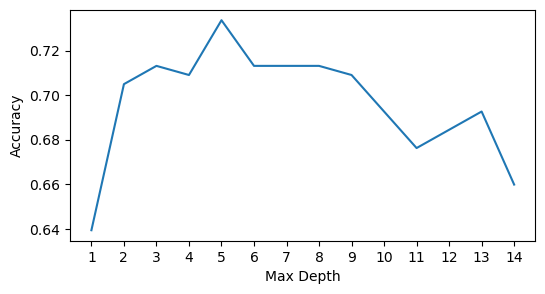

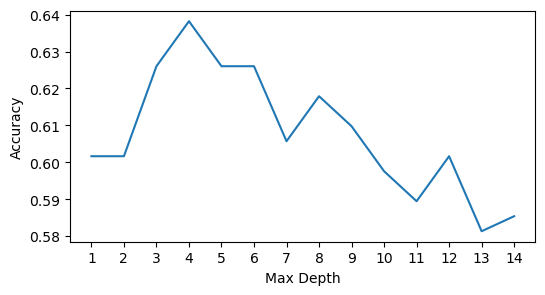

In [426]:
# Getting the best value for max_depth parameter in classfication model
# 2017/18 Dataset
performance = []
for max_d in range(1, 15):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train_17, y_train_17)
    y_pred = model.predict(X_test_17)
    accuracy = accuracy_score(y_test_17, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

# 2018/19 Dataset
performance = []
for max_d in range(1, 15):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train_18, y_train_18)
    y_pred = model.predict(X_test_18)
    accuracy = accuracy_score(y_test_18, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

Decision Tree-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage
Classification on 2017/18 NBA season:
Accuracy: 0.7336065573770492
              precision    recall  f1-score   support

        HOME       0.75      0.84      0.79       133
         TIE       0.00      0.00      0.00        13
     VISITOR       0.72      0.68      0.70        98

    accuracy                           0.73       244
   macro avg       0.49      0.51      0.50       244
weighted avg       0.70      0.73      0.71       244

Classification on 2018/19 NBA season:
Accuracy: 0.6382113821138211
              precision    recall  f1-score   support

        HOME       0.67      0.75      0.71       129
         TIE       0.00      0.00      0.00        20
     VISITOR       0.59      0.62      0.60        97

    accuracy                           0.64       246
   macro avg       0.42      0.46      0.44       246
weighted avg       0.59      0.64      0.61   

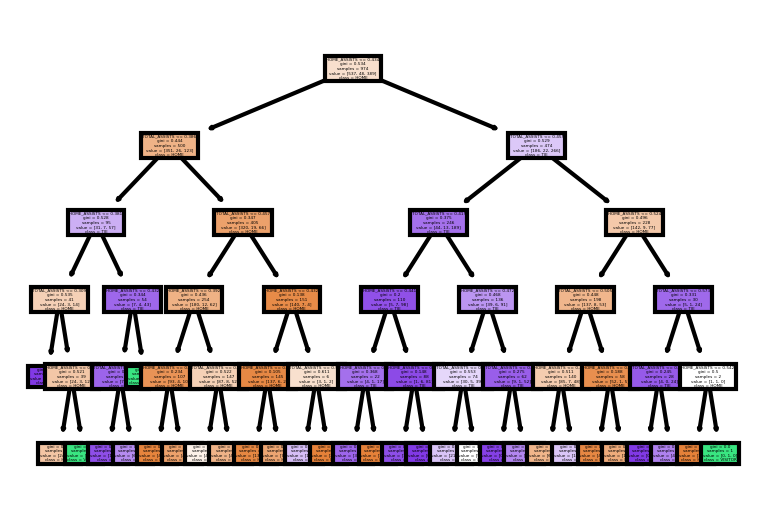

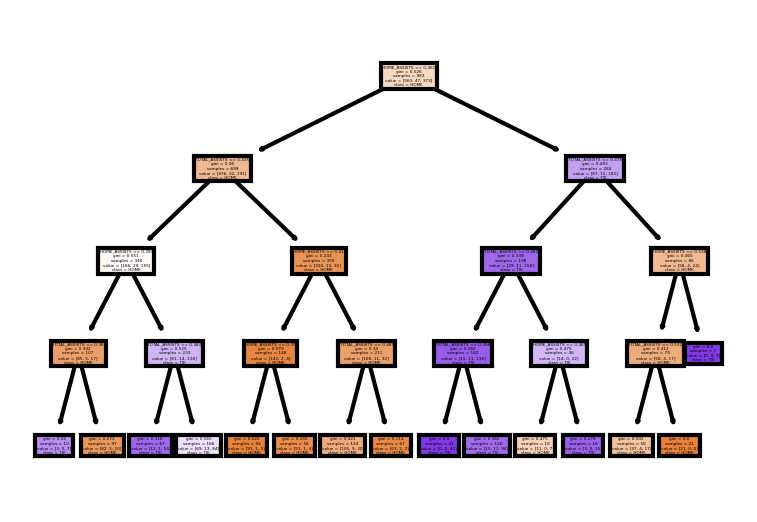

In [433]:
fn=assistsRebounds17_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
print("Decision Tree-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage")

# 2017/18 Dataset
dt = DecisionTreeClassifier(max_depth=5, random_state=42) # 5 is chosen as max_depth for this model
dt.fit(X_train_17, y_train_17)
y_pred = dt.predict(X_test_17)
print("Classification on 2017/18 NBA season:")
print("Accuracy:", accuracy_score(y_test_17, y_pred))
print(classification_report(y_test_17, y_pred, zero_division=0))

# Decision Tree Visualisation
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 2018/19 Dataset
dt = DecisionTreeClassifier(max_depth=4, random_state=42) # 4 is chosen as max_depth for this model
dt.fit(X_train_18, y_train_18)
y_pred = dt.predict(X_test_18)
print("Classification on 2018/19 NBA season:")
print("Accuracy:", accuracy_score(y_test_18, y_pred))
print(classification_report(y_test_18, y_pred, zero_division=0))
# Decision Tree Visualisation
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Random Forest-based Classifier model

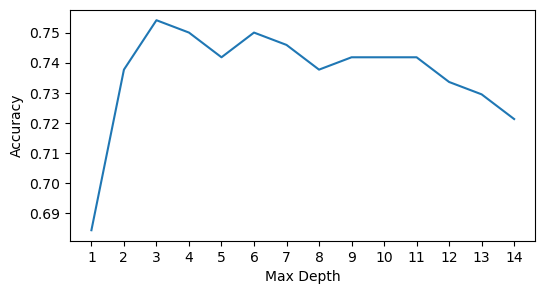

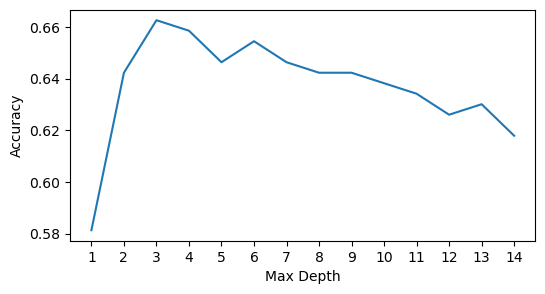

In [428]:
# Getting the best value for max_depth parameter in classfication model
# 2017/18 Dataset
performance = []
for max_d in range(1, 15):
    rf = RandomForestClassifier(max_depth=max_d, random_state=0)
    rf.fit(X_train_17, y_train_17)
    y_pred = rf.predict(X_test_17)
    accuracy = accuracy_score(y_test_17, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

# 2018/19 Dataset
performance = []
for max_d in range(1, 15):
    rf = RandomForestClassifier(max_depth=max_d, random_state=0)
    rf.fit(X_train_18, y_train_18)
    y_pred = rf.predict(X_test_18)
    accuracy = accuracy_score(y_test_18, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

Random Forest-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage
Classification on 2017/18 NBA season:
Accuracy: 0.7540983606557377
              precision    recall  f1-score   support

        HOME       0.79      0.81      0.80       133
         TIE       0.00      0.00      0.00        13
     VISITOR       0.70      0.78      0.74        98

    accuracy                           0.75       244
   macro avg       0.50      0.53      0.51       244
weighted avg       0.72      0.75      0.73       244



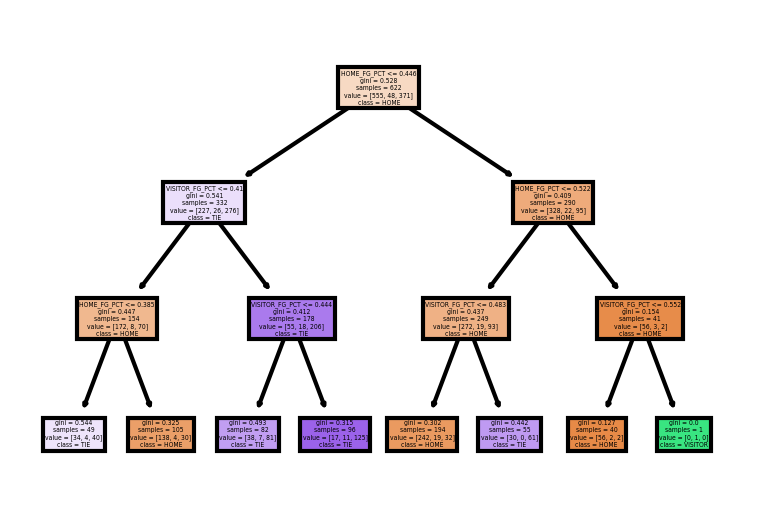

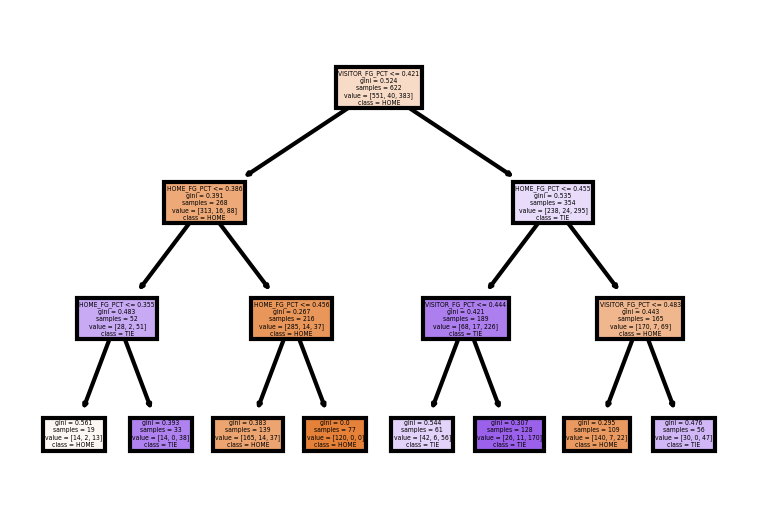

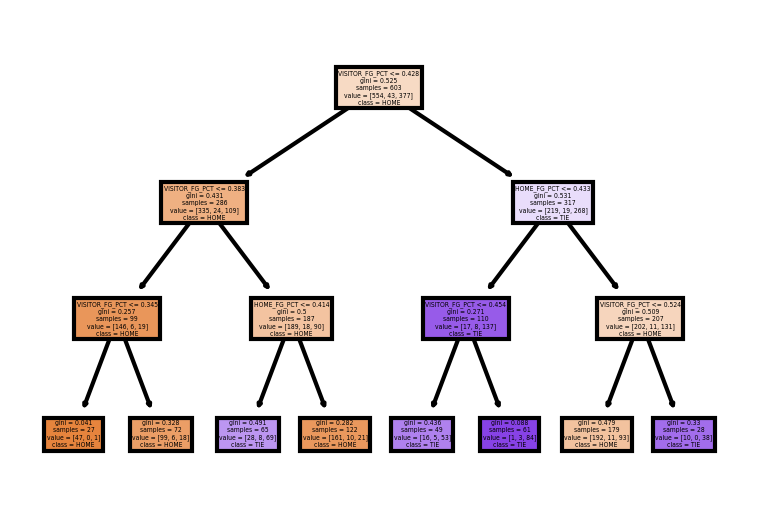

In [430]:
print("Random Forest-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage")
# 2017/18 Dataset
rf = RandomForestClassifier(max_depth=3, random_state=0) # 3 is chosen as max_depth for this model
rf.fit(X_train_17, y_train_17)
y_pred = rf.predict(X_test_17)
print("Classification on 2017/18 NBA season:")
print("Accuracy:", accuracy_score(y_test_17, y_pred))
print(classification_report(y_test_17, y_pred, zero_division=0))

# Random Forest Visualisation
fn=fieldGoalPct17_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
# 1st Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 50th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[49],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 100th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[99],
               feature_names = fn, 
               class_names=cn,
               filled = True);

Random Forest-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage
Classification on 2018/19 NBA season:
Accuracy: 0.6626016260162602
              precision    recall  f1-score   support

        HOME       0.67      0.82      0.74       129
         TIE       0.00      0.00      0.00        20
     VISITOR       0.66      0.59      0.62        97

    accuracy                           0.66       246
   macro avg       0.44      0.47      0.45       246
weighted avg       0.61      0.66      0.63       246



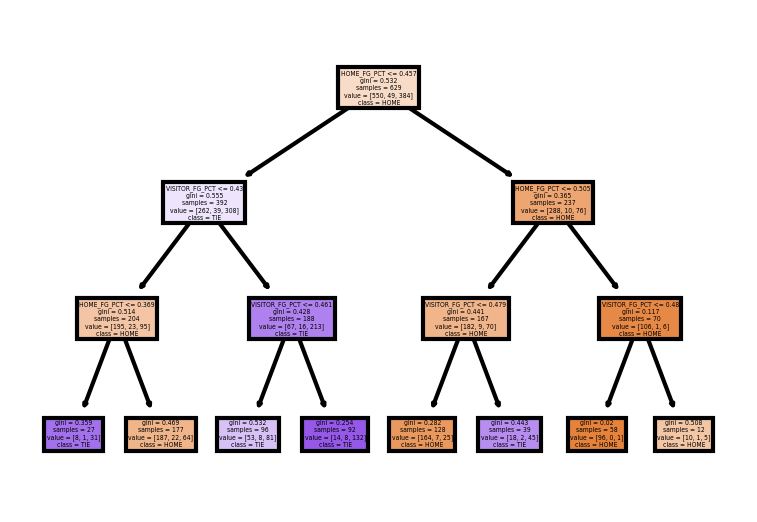

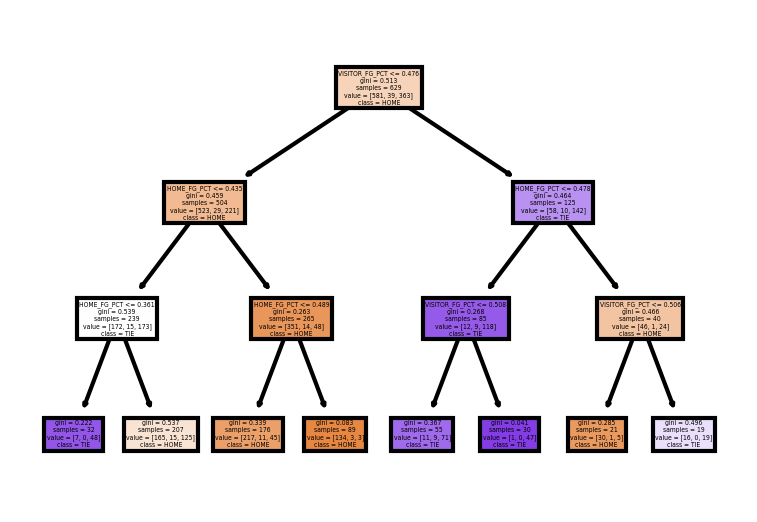

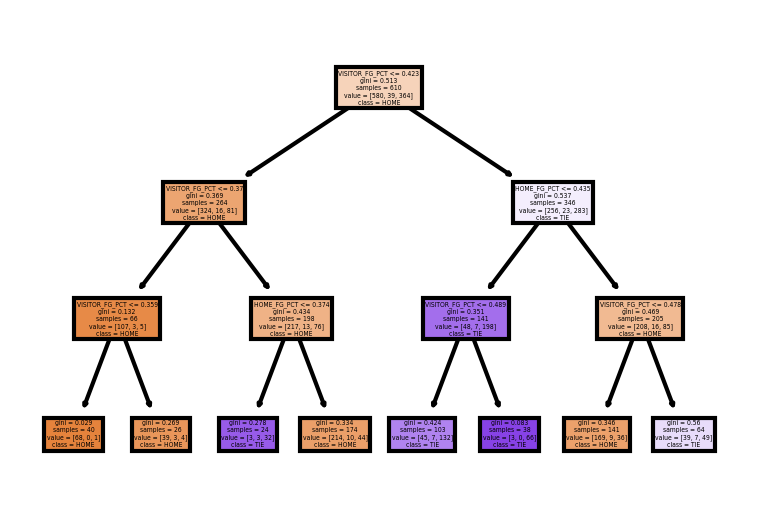

In [431]:
print("Random Forest-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage")
# 2018/19 Dataset
rf = RandomForestClassifier(max_depth=3, random_state=0) # 3 is chosen as max_depth for this model
rf.fit(X_train_18, y_train_18)
y_pred = rf.predict(X_test_18)
print("Classification on 2018/19 NBA season:")
print("Accuracy:", accuracy_score(y_test_18, y_pred))
print(classification_report(y_test_18, y_pred, zero_division=0))

# Random Forest Visualisation
fn=fieldGoalPct18_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
# 1st Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 50th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[49],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 100th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[99],
               feature_names = fn, 
               class_names=cn,
               filled = True);

Discovering correlation between Average Field Goal Percentage and Win Count

In [377]:
# Average Field Goal Percentage of every NBA team throughout the 2017/18 season
average_home_fieldGoalPct_17 = schedule_fieldGoalPct_17.groupby('HOME_NAME')['HOME_FG_PCT'].mean()
average_visitor_fieldGoalPct_17 = schedule_fieldGoalPct_17.groupby('VISITOR_NAME')['VISITOR_FG_PCT'].mean()
average_fieldGoalPct_17 = pd.concat([average_home_fieldGoalPct_17, average_visitor_fieldGoalPct_17], axis=1).mean(axis=1)

# Average Field Goal Percentage of every NBA team throughout the 2018/19 season
average_home_fieldGoalPct_18 = schedule_fieldGoalPct_18.groupby('HOME_NAME')['HOME_FG_PCT'].mean()
average_visitor_fieldGoalPct_18 = schedule_fieldGoalPct_18.groupby('VISITOR_NAME')['VISITOR_FG_PCT'].mean()
average_fieldGoalPct_18 = pd.concat([average_home_fieldGoalPct_18, average_visitor_fieldGoalPct_18], axis=1).mean(axis=1)

average_fieldGoalPct_18

ATL    0.428113
BKN    0.430115
BOS    0.440112
CHA    0.425442
CHI    0.433165
CLE    0.433008
DAL    0.426666
DEN    0.445507
DET    0.421563
GSW    0.458562
HOU    0.426763
IND    0.450699
LAC    0.448394
LAL    0.444760
MEM    0.423414
MIA    0.425443
MIL    0.447856
MIN    0.433577
NOP    0.448270
NYK    0.409531
OKC    0.431056
ORL    0.428131
PHI    0.445636
PHX    0.434447
POR    0.444520
SAC    0.443325
SAS    0.455860
TOR    0.448770
UTA    0.438781
WAS    0.445639
dtype: float64

In [ ]:
# Win count of every NBA team in the 2017/18 & 2018/19 season
win_counts_17 = results_17.WINNER_TEAM.value_counts()
win_counts_18 = results_18.WINNER_TEAM.value_counts()

win_counts_18.head()

MIL    59
GSW    57
TOR    54
DEN    52
HOU    51
Name: WINNER_TEAM, dtype: int64

In [378]:
# Average Field Goal Percentage of an NBA team and their Win count in the 2017/18 season
fieldGoalPct_wins_17 = pd.concat([average_fieldGoalPct_17, win_counts_17], axis=1)
fieldGoalPct_wins_17.columns = ['AVERAGE_FG_PCT', 'WINS']

# Average Field Goal Percentage of an NBA team and their Win count in the 2018/19 season
fieldGoalPct_wins_18 = pd.concat([average_fieldGoalPct_18, win_counts_18], axis=1)
fieldGoalPct_wins_18.columns = ['AVERAGE_FG_PCT', 'WINS']

fieldGoalPct_wins_18

,AVERAGE_FG_PCT,WINS
ATL,0.428113,26
BKN,0.430115,37
BOS,0.440112,45
CHA,0.425442,38
CHI,0.433165,19
CLE,0.433008,19
DAL,0.426666,32
DEN,0.445507,52
DET,0.421563,36
GSW,0.458562,57


In the NBA 2017/18 season, the correlation between average field goal percentage and win count for an NBA team is: 
0.569904199791632
In the NBA 2018/19 season, the correlation between average field goal percentage and win count for an NBA team is: 
0.5577926465650369


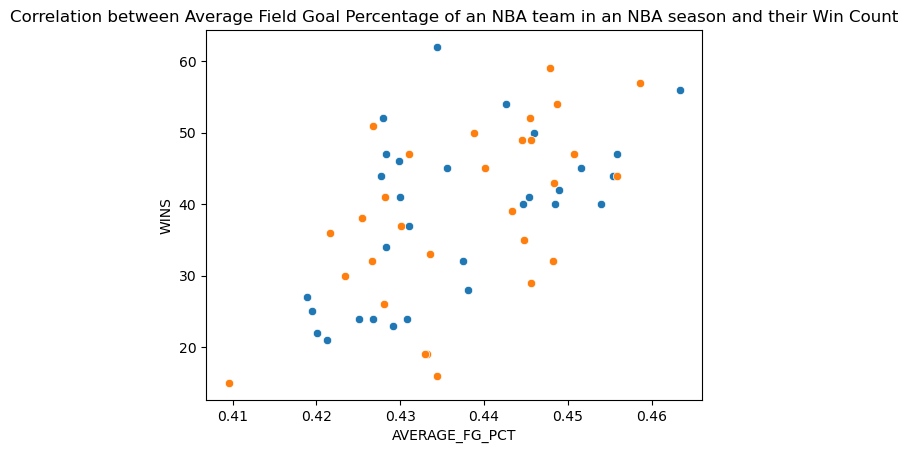

In [379]:
sns.scatterplot(x=fieldGoalPct_wins_17['AVERAGE_FG_PCT'], y=fieldGoalPct_wins_17['WINS'])
sns.scatterplot(x=fieldGoalPct_wins_18['AVERAGE_FG_PCT'], y=fieldGoalPct_wins_18['WINS'])
plt.title("Correlation between Average Field Goal Percentage of an NBA team in an NBA season and their Win Count")

print("In the NBA 2017/18 season, the correlation between average field goal percentage and win count for an NBA team is: ")
print(fieldGoalPct_wins_17['AVERAGE_FG_PCT'].corr(fieldGoalPct_wins_17['WINS']))
print("In the NBA 2018/19 season, the correlation between average field goal percentage and win count for an NBA team is: ")
print(fieldGoalPct_wins_18['AVERAGE_FG_PCT'].corr(fieldGoalPct_wins_18['WINS']))

***
# Predicting the result of an NBA game based on a team's assist and rebound statistics

Gathering rebound statistics of every team in every game

In [380]:
# Total Rebounds per game, and how many rebounds did the home teams, and visitor teams get
df17_rebounds = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 4)].count())
df18_rebounds = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 4)].count())

In [381]:
# 2017/18 Schedule with competing teams and their respective shot attempt counts
schedule_rebounds_17 = pd.merge(df17_rebounds, schedule_2017, on= ['GAME_ID'])
schedule_rebounds_17.columns = ['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_rebounds_17['REBOUNDS_MARGIN'] = schedule_rebounds_17.apply(lambda x: x['HOME_REBOUNDS'] - x['VISITOR_REBOUNDS'], axis=1)

# 2018/19 Schedule with competing teams and their respective shot attempt counts
schedule_rebounds_18 = pd.merge(df18_rebounds, schedule_2018, on= ['GAME_ID'])
schedule_rebounds_18.columns = ['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_rebounds_18['REBOUNDS_MARGIN'] = schedule_rebounds_18.apply(lambda x: x['HOME_REBOUNDS'] - x['VISITOR_REBOUNDS'], axis=1)
schedule_rebounds_18

,GAME_ID,TOTAL_REBOUNDS,HOME_REBOUNDS,VISITOR_REBOUNDS,HOME_ID,HOME_NAME,VISITOR_ID,VISITOR_NAME,REBOUNDS_MARGIN
0,21800001,121,64,57,1.610613e+09,BOS,1.610613e+09,PHI,7
1,21800002,125,66,59,1.610613e+09,GSW,1.610613e+09,OKC,7
2,21800003,107,45,62,1.610613e+09,CHA,1.610613e+09,MIL,-17
3,21800004,105,54,51,1.610613e+09,DET,1.610613e+09,BKN,3
4,21800005,106,67,39,1.610613e+09,IND,1.610613e+09,MEM,28
...,...,...,...,...,...,...,...,...,...
1224,21801226,119,63,56,1.610613e+09,MIL,1.610613e+09,OKC,7
1225,21801227,107,60,47,1.610613e+09,SAS,1.610613e+09,DAL,13
1226,21801228,108,61,47,1.610613e+09,DEN,1.610613e+09,MIN,14
1227,21801229,122,58,64,1.610613e+09,LAC,1.610613e+09,UTA,-6


Gathering assist statistics of every team in every game

In [382]:
# Total assists per game, and how many assists did the home teams, and visitor teams get
df17_assists = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION', 'PLAYER2_ID']].apply(lambda x: x[(x.EVENTMSGTYPE == 1) & (x.PLAYER2_ID != 0)].count())
df18_assists = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION', 'PLAYER2_ID']].apply(lambda x: x[(x.EVENTMSGTYPE == 1) & (x.PLAYER2_ID != 0)].count())

df17_assists = df17_assists.drop('PLAYER2_ID', axis=1)
df18_assists = df18_assists.drop('PLAYER2_ID', axis=1)


In [383]:
# 2017/18 Schedule with competing teams and their respective shot attempt counts
schedule_assists_17 = pd.merge(df17_assists, schedule_2017, on= ['GAME_ID'])
schedule_assists_17.columns = ['GAME_ID', 'TOTAL_ASSISTS', 'HOME_ASSISTS', 'VISITOR_ASSISTS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_assists_17['ASSISTS_MARGIN'] = schedule_assists_17.apply(lambda x: x['HOME_ASSISTS'] - x['VISITOR_ASSISTS'], axis=1)

# 2018/19 Schedule with competing teams and their respective shot attempt counts
schedule_assists_18 = pd.merge(df18_assists, schedule_2018, on= ['GAME_ID'])
schedule_assists_18.columns = ['GAME_ID', 'TOTAL_ASSISTS', 'HOME_ASSISTS', 'VISITOR_ASSISTS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_assists_18['ASSISTS_MARGIN'] = schedule_assists_18.apply(lambda x: x['HOME_ASSISTS'] - x['VISITOR_ASSISTS'], axis=1)

Combining Assists, Rebound, and Winner dataframes into a single dataframe

In [384]:
schedule_assists_rebounds_17 = pd.merge(pd.merge(schedule_assists_17[['GAME_ID', 'TOTAL_ASSISTS', 'HOME_ASSISTS', 'VISITOR_ASSISTS', 'ASSISTS_MARGIN']],schedule_rebounds_17[['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'REBOUNDS_MARGIN']], on=['GAME_ID']), winners_17, on=['GAME_ID'])
schedule_assists_rebounds_18 = pd.merge(pd.merge(schedule_assists_18[['GAME_ID', 'TOTAL_ASSISTS', 'HOME_ASSISTS', 'VISITOR_ASSISTS', 'ASSISTS_MARGIN']],schedule_rebounds_18[['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'REBOUNDS_MARGIN']], on=['GAME_ID']), winners_18, on=['GAME_ID'])
schedule_assists_rebounds_18

,GAME_ID,TOTAL_ASSISTS,HOME_ASSISTS,VISITOR_ASSISTS,ASSISTS_MARGIN,TOTAL_REBOUNDS,HOME_REBOUNDS,VISITOR_REBOUNDS,REBOUNDS_MARGIN,SCOREMARGIN,WINNER
0,21800001,39,21,18,3,121,64,57,7,18,HOME
1,21800002,49,28,21,7,125,66,59,7,8,HOME
2,21800003,47,21,26,-5,107,45,62,-17,-1,VISITOR
3,21800004,49,21,28,-7,105,54,51,3,3,HOME
4,21800005,45,29,16,13,106,67,39,28,28,HOME
...,...,...,...,...,...,...,...,...,...,...,...
1224,21801226,67,27,40,-13,119,63,56,7,-11,VISITOR
1225,21801227,49,22,27,-5,107,60,47,13,11,HOME
1226,21801228,47,23,24,-1,108,61,47,14,4,HOME
1227,21801229,65,34,31,3,122,58,64,-6,TIE,TIE


In [434]:
assistsRebounds17_X_Train = schedule_assists_rebounds_17[['TOTAL_ASSISTS','HOME_ASSISTS', 'VISITOR_ASSISTS', 'ASSISTS_MARGIN', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'REBOUNDS_MARGIN']]
assistsRebounds17_y_train = schedule_assists_rebounds_17['WINNER']

assistsRebounds18_X_Train = schedule_assists_rebounds_18[['TOTAL_ASSISTS','HOME_ASSISTS', 'VISITOR_ASSISTS', 'ASSISTS_MARGIN', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'REBOUNDS_MARGIN']]
assistsRebounds18_y_train = schedule_assists_rebounds_18['WINNER']

# Split dataframe for training and testing classifer
X_train_17, X_test_17, y_train_17, y_test_17 = train_test_split(assistsRebounds17_X_Train, assistsRebounds17_y_train, test_size=0.2, random_state=42)
X_train_18, X_test_18, y_train_18, y_test_18 = train_test_split(assistsRebounds18_X_Train, assistsRebounds18_y_train, test_size=0.2, random_state=42)


### Decision Tree-based Classifier Model

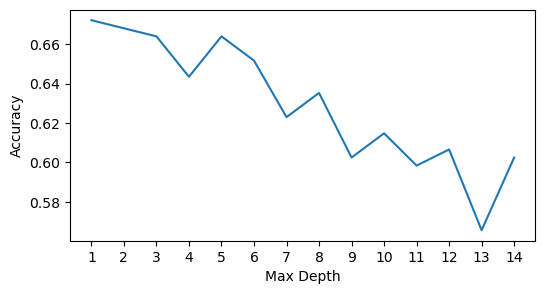

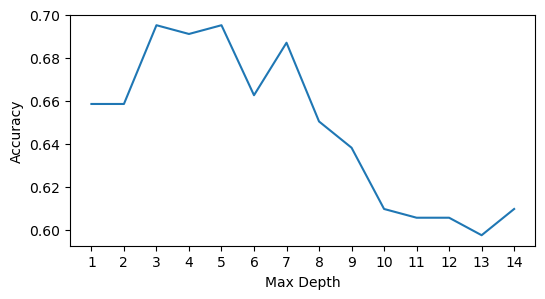

In [435]:
# Get optimal max_depth parameter
# 2017/18 Dataset
performance = []
for max_d in range(1, 15):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train_17, y_train_17)
    y_pred = model.predict(X_test_17)
    accuracy = accuracy_score(y_test_17, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

# 2018/19 Dataset
performance = []
for max_d in range(1, 15):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train_18, y_train_18)
    y_pred = model.predict(X_test_18)
    accuracy = accuracy_score(y_test_18, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

Decision Tree-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic
Classification on 2017/18 NBA season:
Accuracy: 0.6639344262295082
              precision    recall  f1-score   support

        HOME       0.72      0.72      0.72       133
         TIE       0.00      0.00      0.00        13
     VISITOR       0.61      0.67      0.64        98

    accuracy                           0.66       244
   macro avg       0.44      0.47      0.45       244
weighted avg       0.64      0.66      0.65       244



Classification on 2018/19 NBA season:
Accuracy: 0.6951219512195121
              precision    recall  f1-score   support

        HOME       0.69      0.84      0.76       129
         TIE       0.60      0.30      0.40        20
     VISITOR       0.71      0.59      0.64        97

    accuracy                           0.70       246
   macro avg       0.67      0.57      0.60       246
weighted avg       0.69      0.70      0.68       246



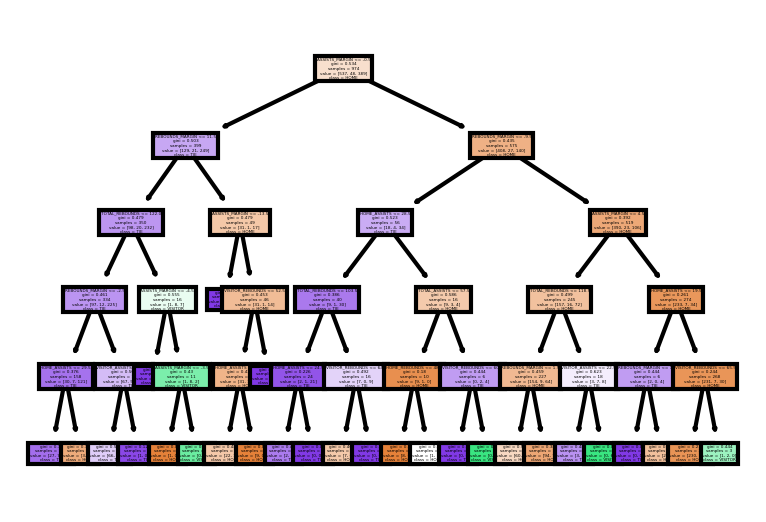

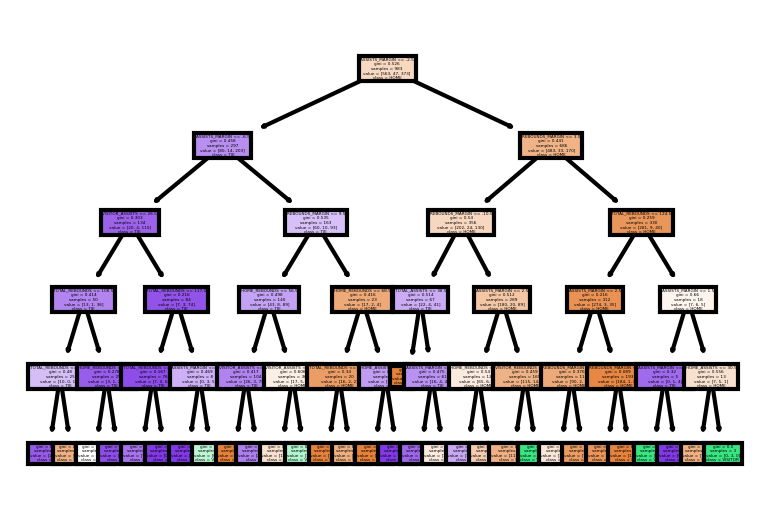

In [436]:
fn=assistsRebounds17_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
print("Decision Tree-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic")
# 2017/18 Dataset
dt = DecisionTreeClassifier(max_depth=5, random_state=42) # 5 is chosen as max_depth for this model
dt.fit(X_train_17, y_train_17)
y_pred = dt.predict(X_test_17)
print("Classification on 2017/18 NBA season:")
print("Accuracy:", accuracy_score(y_test_17, y_pred))
print(classification_report(y_test_17, y_pred, zero_division=0))

# Decision Tree Visualisation
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 2018/19 Dataset
dt = DecisionTreeClassifier(max_depth=5, random_state=42) # 5 is chosen as max_depth for this model
dt.fit(X_train_18, y_train_18)
y_pred = dt.predict(X_test_18)
print("Classification on 2018/19 NBA season:")
print("Accuracy:", accuracy_score(y_test_18, y_pred))
print(classification_report(y_test_18, y_pred, zero_division=0))

# Decision Tree Visualisation
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Random Forest-based Classifier model

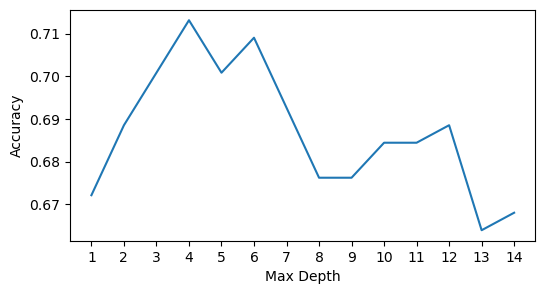

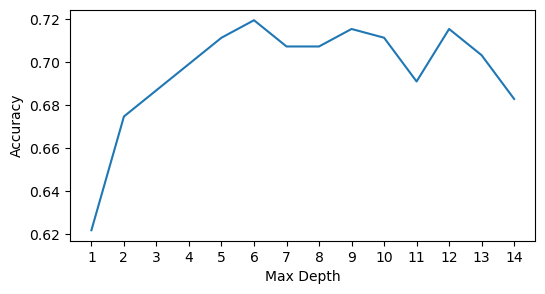

In [437]:
# Determining best value for max_depth parameter in classification model
# 2017/18 Dataset
performance = []
for max_d in range(1, 15):
    rf = RandomForestClassifier(max_depth=max_d, random_state=0)
    rf.fit(X_train_17, y_train_17)
    y_pred = rf.predict(X_test_17)
    accuracy = accuracy_score(y_test_17, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

# 2018/19 Dataset
performance = []
for max_d in range(1, 15):
    rf = RandomForestClassifier(max_depth=max_d, random_state=0)
    rf.fit(X_train_18, y_train_18)
    y_pred = rf.predict(X_test_18)
    accuracy = accuracy_score(y_test_18, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

Random Forest-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic


Classification on 2017/18 NBA season:
Accuracy: 0.7131147540983607
              precision    recall  f1-score   support

        HOME       0.74      0.80      0.77       133
         TIE       0.00      0.00      0.00        13
     VISITOR       0.68      0.69      0.69        98

    accuracy                           0.71       244
   macro avg       0.47      0.50      0.48       244
weighted avg       0.67      0.71      0.69       244



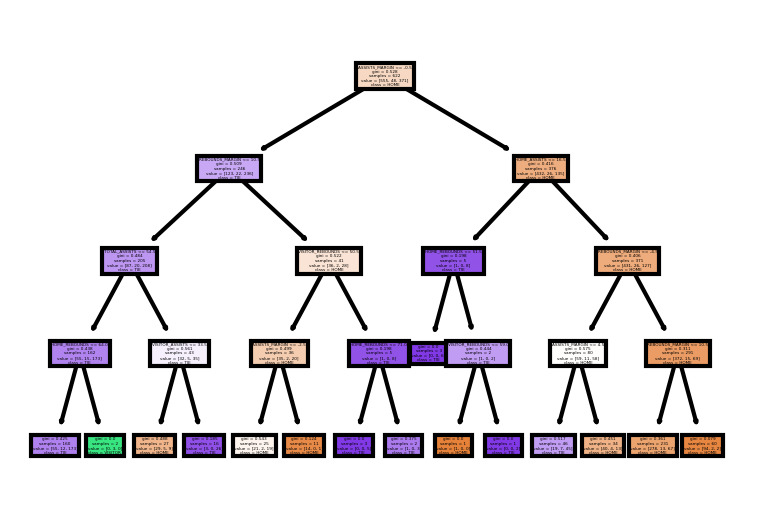

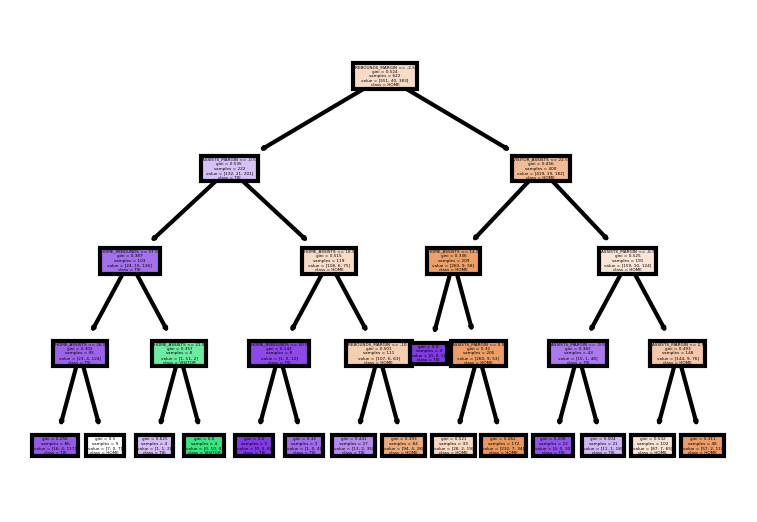

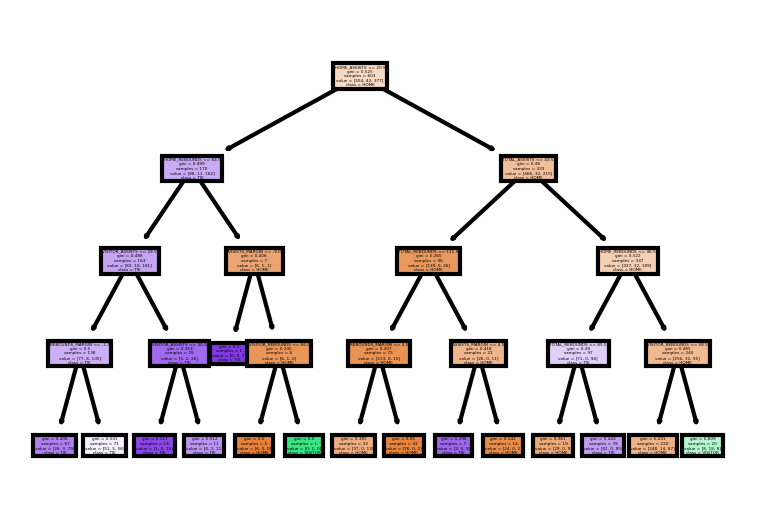

In [438]:
print("Random Forest-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic")
# 2017/18 Dataset
rf = RandomForestClassifier(max_depth=4, random_state=0) # 4 is chosen as max_depth for this model
rf.fit(X_train_17, y_train_17)
y_pred = rf.predict(X_test_17)
print("Classification on 2017/18 NBA season:")
print("Accuracy:", accuracy_score(y_test_17, y_pred))
print(classification_report(y_test_17, y_pred, zero_division=0))

# Random Forest Visualisation
fn=assistsRebounds17_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
# 1st Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 50th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[49],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 100th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[99],
               feature_names = fn, 
               class_names=cn,
               filled = True);


Random Forest-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic
Classification on 2018/19 NBA season:
Accuracy: 0.6869918699186992
              precision    recall  f1-score   support

        HOME       0.67      0.91      0.77       129
         TIE       0.00      0.00      0.00        20
     VISITOR       0.73      0.54      0.62        97

    accuracy                           0.69       246
   macro avg       0.47      0.48      0.46       246
weighted avg       0.64      0.69      0.65       246



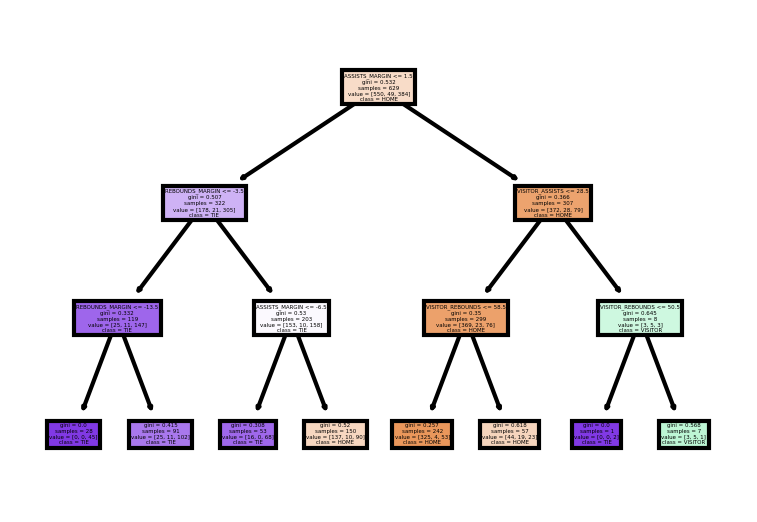

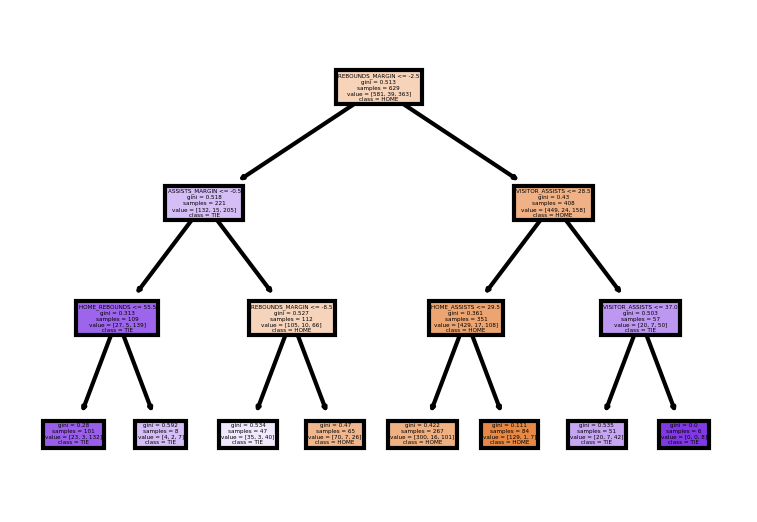

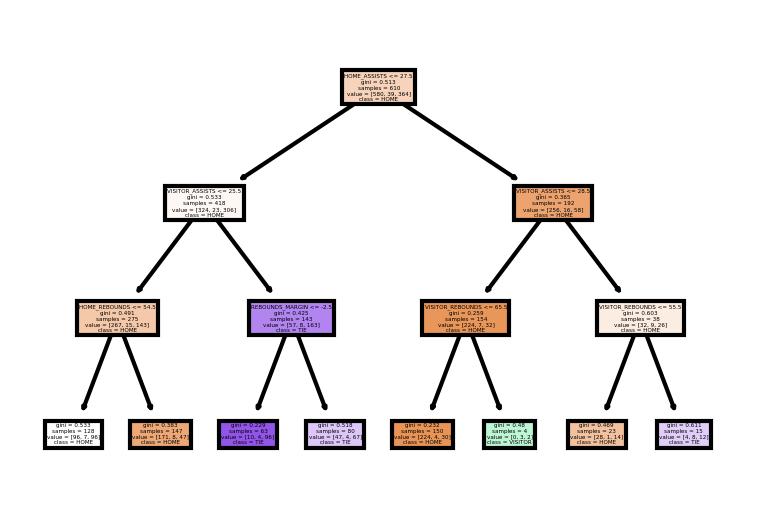

In [439]:
print("Random Forest-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic")
# 2018/19 Dataset
rf = RandomForestClassifier(max_depth=3, random_state=0) # 3 is chosen as max_depth for this model
rf.fit(X_train_18, y_train_18)
y_pred = rf.predict(X_test_18)
print("Classification on 2018/19 NBA season:")
print("Accuracy:", accuracy_score(y_test_18, y_pred))
print(classification_report(y_test_18, y_pred, zero_division=0))

# Random Forest Visualisation
fn=assistsRebounds18_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
# 1st Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 50th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[49],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 100th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[99],
               feature_names = fn, 
               class_names=cn,
               filled = True);

***
### Clustering Analysis Program
based on amount of times a player commits a foul with amount of times a player is fouled

In [ ]:
# Remove rows with value '0' in PLAYER1_ID column
players_2016 = df_2016[df_2016.PLAYER1_ID != 0]
players_2017 = df_2017[df_2017.PLAYER1_ID != 0]
players_2018 = df_2018[df_2018.PLAYER1_ID != 0]

In [ ]:
# Fouls committed by each player from the 2016/2017 to 2018/2019 NBA season
playerFouls_16 = players_2016.groupby('PLAYER1_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouls_17 = players_2017.groupby('PLAYER1_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouls_18 = players_2018.groupby('PLAYER1_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())

aggregate_playerFouls = pd.concat([playerFouls_16, playerFouls_17, playerFouls_18], axis=1)
playerFouls = aggregate_playerFouls.sum(axis=1)

# Remove row with 0 as PLAYER1_ID as it is an invalid value
playerFouls = playerFouls[playerFouls.index != 0].to_frame()
playerFouls.columns = ['FOULS']

In [ ]:
# Fouls commited against each player from the 2016/2017 to 2018/2019 NBA season
playerFouleds_16 = players_2016.groupby('PLAYER2_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouleds_17 = players_2017.groupby('PLAYER2_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouleds_18 = players_2018.groupby('PLAYER2_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())

aggregate_playerFouleds = pd.concat([playerFouleds_16, playerFouleds_17, playerFouleds_18], axis=1)
playerFouleds = aggregate_playerFouleds.sum(axis=1)

# Remove row with 0 as PLAYER1_ID as it is an invalid value
playerFouleds = playerFouleds[playerFouleds.index != 0].to_frame()
playerFouleds.columns = ['FOULEDS']

In [ ]:
# Calculate how many games is the player involved in
def getGamesInvolved(player):    
    player_id = player.name
    
    gamesInvolved_2016 = df_2016.groupby('GAME_ID').apply(lambda x: (x['PLAYER1_ID'] == player_id).sum() +( x['PLAYER2_ID'] == player_id).sum() + (x['PLAYER3_ID'] == player_id).sum())
    gamesInvolved_2017 = df_2017.groupby('GAME_ID').apply(lambda x: (x['PLAYER1_ID'] == player_id).sum() +( x['PLAYER2_ID'] == player_id).sum() + (x['PLAYER3_ID'] == player_id).sum())
    gamesInvolved_2018 = df_2018.groupby('GAME_ID').apply(lambda x: (x['PLAYER1_ID'] == player_id).sum() +( x['PLAYER2_ID'] == player_id).sum() + (x['PLAYER3_ID'] == player_id).sum())
    
    return len(gamesInvolved_2016[gamesInvolved_2016 > 0]) + len(gamesInvolved_2017[gamesInvolved_2017 > 0]) + len(gamesInvolved_2018[gamesInvolved_2018 > 0]) 

In [ ]:
# Get Fouls per Game for each NBA player
playerFouls['GAMES_INVOLVED'] = playerFouls.apply(lambda x: getGamesInvolved(x), axis=1)
playerFouls['FOULS_PER_GAME'] = playerFouls.apply(lambda x: x.FOULS/x.GAMES_INVOLVED if x.GAMES_INVOLVED != 0 else 0, axis=1)

In [ ]:
# Get Fouleds per Game for each NBA player
playerFouleds['GAMES_INVOLVED'] = playerFouleds.apply(lambda x: getGamesInvolved(x), axis=1)
playerFouleds['FOULEDS_PER_GAME'] = playerFouleds.apply(lambda x: x.FOULEDS/x.GAMES_INVOLVED if x.GAMES_INVOLVED != 0 else 0, axis=1)

<AxesSubplot:xlabel='FOULEDS_PER_GAME', ylabel='FOULS_PER_GAME'>

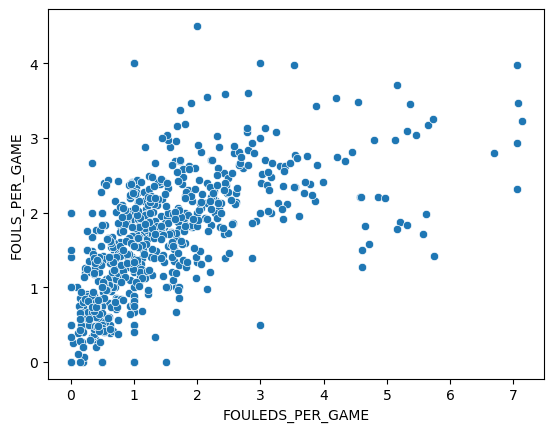

In [ ]:
# Building scatter plot
sns.scatterplot(x=playerFouleds['FOULEDS_PER_GAME'], y=playerFouls['FOULS_PER_GAME'])

In [ ]:
# Build dataframe for clustering
fouls_cluster_df = pd.merge(playerFouleds, playerFouls, left_index=True, right_index=True)[['FOULEDS_PER_GAME', 'FOULS_PER_GAME']]
fouls_cluster_df.head()

,FOULEDS_PER_GAME,FOULS_PER_GAME
1713.0,1.064286,1.821429
1718.0,1.333333,0.333333
1891.0,0.220339,1.186441
1897.0,1.000000,0.000000
1938.0,2.123288,1.931507


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

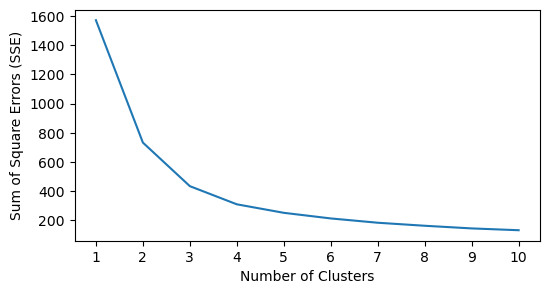

In [ ]:
# Selecting optimal number of clusters by using Elbow Method
from sklearn.cluster import KMeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(fouls_cluster_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,3))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Square Errors (SSE)")
plt.show()

By using the elbow plot method, we can observe that the optimal number of clusters seems to be around 4.

In [ ]:
# Build dataframe for clustering
fouls_cluster_df = pd.merge(playerFouleds, playerFouls, left_index=True, right_index=True)[['FOULEDS_PER_GAME', 'FOULS_PER_GAME']]
fouls_cluster_df.head()

,FOULEDS_PER_GAME,FOULS_PER_GAME
1713.0,1.064286,1.821429
1718.0,1.333333,0.333333
1891.0,0.220339,1.186441
1897.0,1.000000,0.000000
1938.0,2.123288,1.931507


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


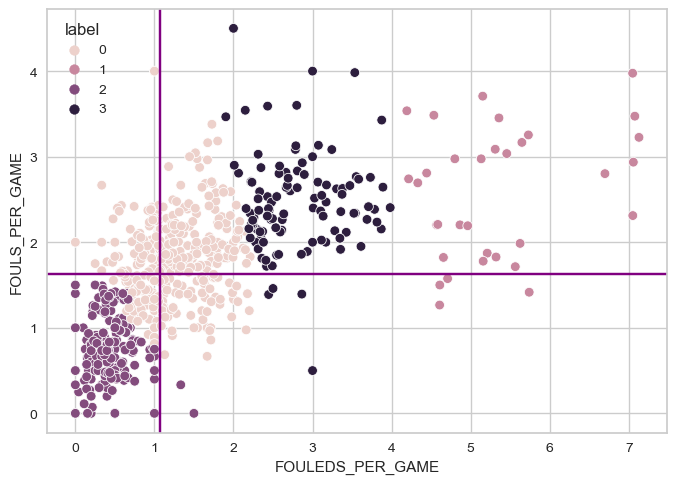

In [ ]:
# K-Means Clustering
KM = KMeans(n_clusters=4, random_state=42, n_init=10)
KM.fit(fouls_cluster_df)
label = KM.fit_predict(fouls_cluster_df)
fouls_cluster_df['label']=label

# Visualise cluster
sns.scatterplot(x=fouls_cluster_df['FOULEDS_PER_GAME'], y=fouls_cluster_df['FOULS_PER_GAME'], hue=fouls_cluster_df['label'])

# Add median line to plot
plt.axvline(x=fouls_cluster_df['FOULEDS_PER_GAME'].median(), color='purple')
plt.axhline(y=fouls_cluster_df['FOULS_PER_GAME'].median(), color='purple')